In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_final_wre.csv")

In [ ]:
df.head()

,year,month,Average Rainfall,nino3,nino3.4,nino4,Arabian_Sea,equatorialindianocean,bayofbengal
0,1901,1,0.202121,26.116969,27.367524,28.489476,26.006408,27.962291,27.214633
1,1901,2,0.000000,26.431279,27.032637,27.911399,25.765964,27.931744,27.232272
2,1901,3,0.066399,26.902539,27.287510,27.964798,26.879438,28.534986,28.201504
3,1901,4,0.000000,27.144844,27.620280,28.213469,28.441569,29.290119,29.288933
4,1901,5,0.039348,26.593484,27.660678,28.473432,29.247251,28.960749,29.527194


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gamma, norm

# Sort and avoid modifying original
df = df.copy()
df.sort_values(['year', 'month'], inplace=True)

# Add small constant to handle zeros
df['Average Rainfall'] += 0.01

# Calculate SPI-1
spi = []

for month in range(1, 13):
    month_mask = df['month'] == month
    month_data = df.loc[month_mask, 'Average Rainfall']

    try:
        shape, loc, scale = gamma.fit(month_data, floc=0)
        cdf_vals = gamma.cdf(month_data, shape, loc=loc, scale=scale)
        spi_vals = norm.ppf(cdf_vals)
    except Exception as e:
        print(f"Error fitting month {month}: {e}")
        spi_vals = [np.nan] * len(month_data)

    df.loc[month_mask, 'SPI_1'] = spi_vals



In [ ]:
df.head()

,year,month,Average Rainfall,nino3,nino3.4,nino4,Arabian_Sea,equatorialindianocean,bayofbengal,SPI_1
0,1901,1,0.212121,26.116969,27.367524,28.489476,26.006408,27.962291,27.214633,1.002762
1,1901,2,0.010000,26.431279,27.032637,27.911399,25.765964,27.931744,27.232272,-0.895327
2,1901,3,0.076399,26.902539,27.287510,27.964798,26.879438,28.534986,28.201504,0.172279
3,1901,4,0.010000,27.144844,27.620280,28.213469,28.441569,29.290119,29.288933,-0.934717
4,1901,5,0.049348,26.593484,27.660678,28.473432,29.247251,28.960749,29.527194,-0.827211


In [ ]:
df

,year,month,Average Rainfall,nino3,nino3.4,nino4,Arabian_Sea,equatorialindianocean,bayofbengal,SPI_1
0,1901,1,0.212121,26.116969,27.367524,28.489476,26.006408,27.962291,27.214633,1.002762
1,1901,2,0.010000,26.431279,27.032637,27.911399,25.765964,27.931744,27.232272,-0.895327
2,1901,3,0.076399,26.902539,27.287510,27.964798,26.879438,28.534986,28.201504,0.172279
3,1901,4,0.010000,27.144844,27.620280,28.213469,28.441569,29.290119,29.288933,-0.934717
4,1901,5,0.049348,26.593484,27.660678,28.473432,29.247251,28.960749,29.527194,-0.827211
...,...,...,...,...,...,...,...,...,...,...
1471,2023,8,0.694356,27.187308,28.446288,29.495814,27.699556,28.893042,29.111107,-1.232998
1472,2023,9,1.290223,26.960477,28.411213,29.578234,28.245983,28.889136,29.282456,0.332545
1473,2023,10,0.628230,26.959293,28.335902,29.537580,29.137354,29.115771,29.452620,1.536401
1474,2023,11,0.324982,27.269745,28.665094,29.819970,28.764297,29.112284,29.068979,2.080702


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1476 non-null   int64  
 1   month                  1476 non-null   int64  
 2   Average Rainfall       1476 non-null   float64
 3   nino3                  1476 non-null   float64
 4   nino3.4                1476 non-null   float64
 5   nino4                  1476 non-null   float64
 6   Arabian_Sea            1476 non-null   float64
 7   equatorialindianocean  1476 non-null   float64
 8   bayofbengal            1476 non-null   float64
 9   SPI_1                  1476 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 115.4 KB


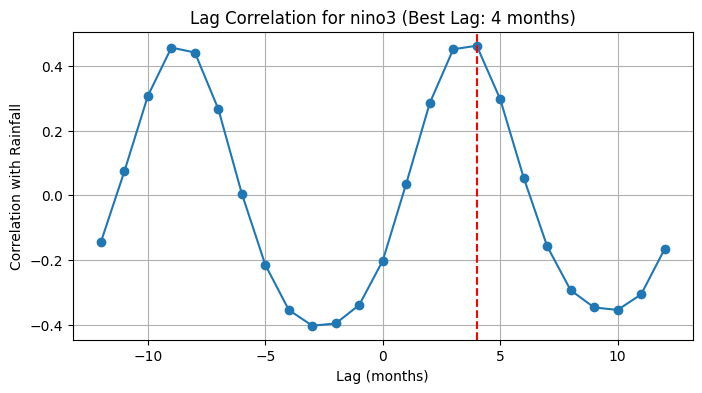

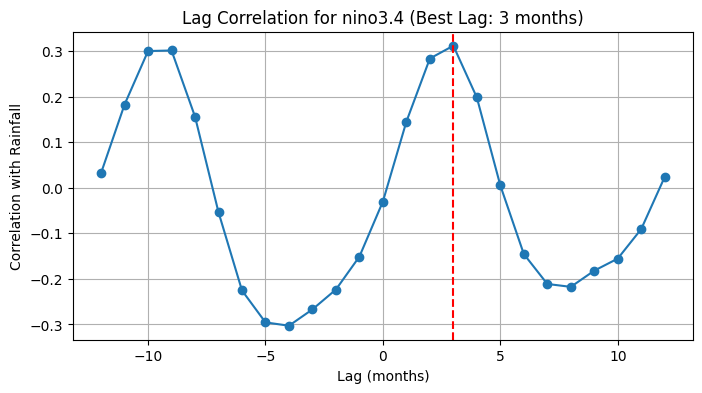

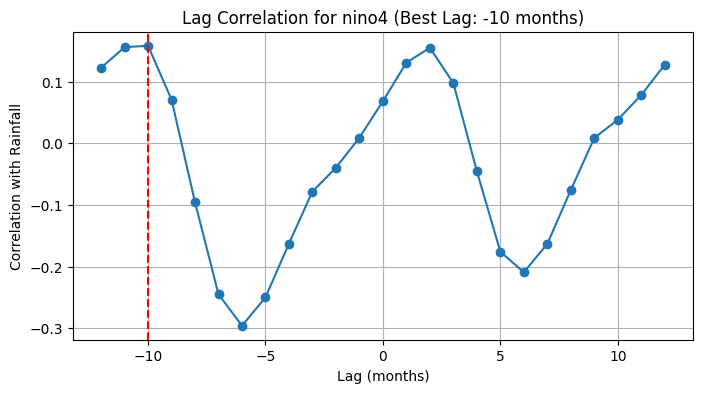

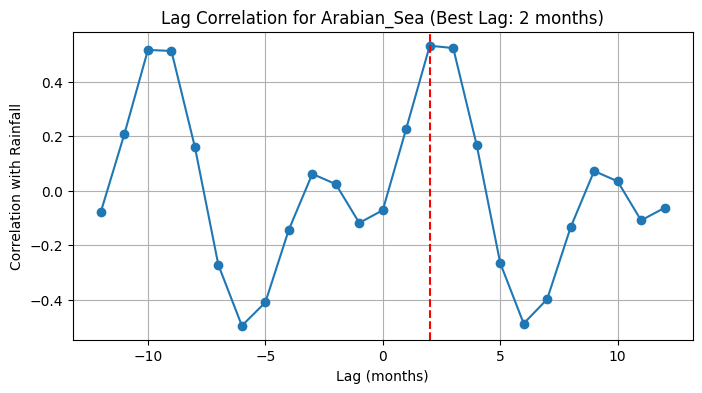

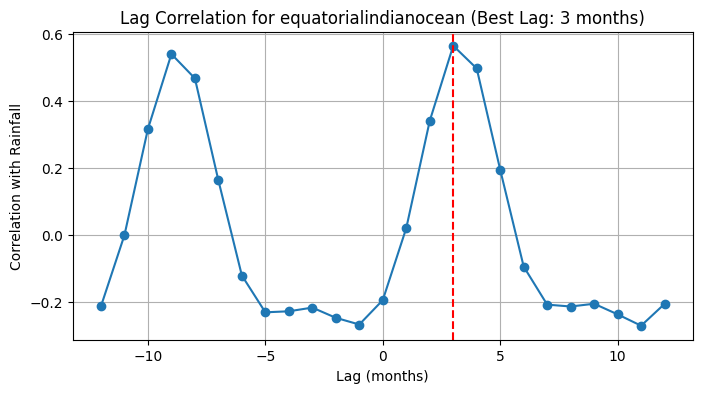

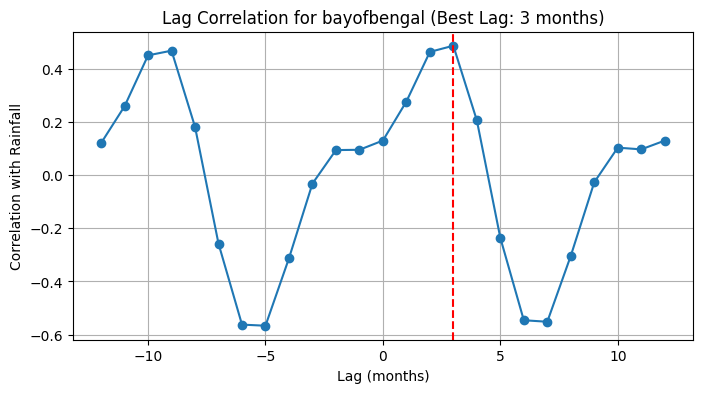

Best lag (in months) for each SST region to affect rainfall:
nino3: 4 months
nino3.4: 3 months
nino4: -10 months
Arabian_Sea: 2 months
equatorialindianocean: 3 months
bayofbengal: 3 months


In [ ]:
import matplotlib.pyplot as plt

sst_columns = ['nino3', 'nino3.4', 'nino4', 'Arabian_Sea', 'equatorialindianocean', 'bayofbengal']

# Maximum number of months to test lag (positive and negative)
max_lag = 12

# Store best lags
best_lags = {}

# Plot and compute cross-correlation
for col in sst_columns:
    correlations = [df['Average Rainfall'].corr(df[col].shift(lag)) for lag in range(-max_lag, max_lag+1)]
    best_lag = np.argmax(correlations) - max_lag
    best_lags[col] = best_lag

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(-max_lag, max_lag+1), correlations, marker='o')
    plt.title(f'Lag Correlation for {col} (Best Lag: {best_lag} months)')
    plt.xlabel('Lag (months)')
    plt.ylabel('Correlation with Rainfall')
    plt.grid(True)
    plt.axvline(x=best_lag, color='r', linestyle='--')
    plt.show()

# Display best lag for each SST factor
print("Best lag (in months) for each SST region to affect rainfall:")
for key, val in best_lags.items():
    print(f"{key}: {val} months")


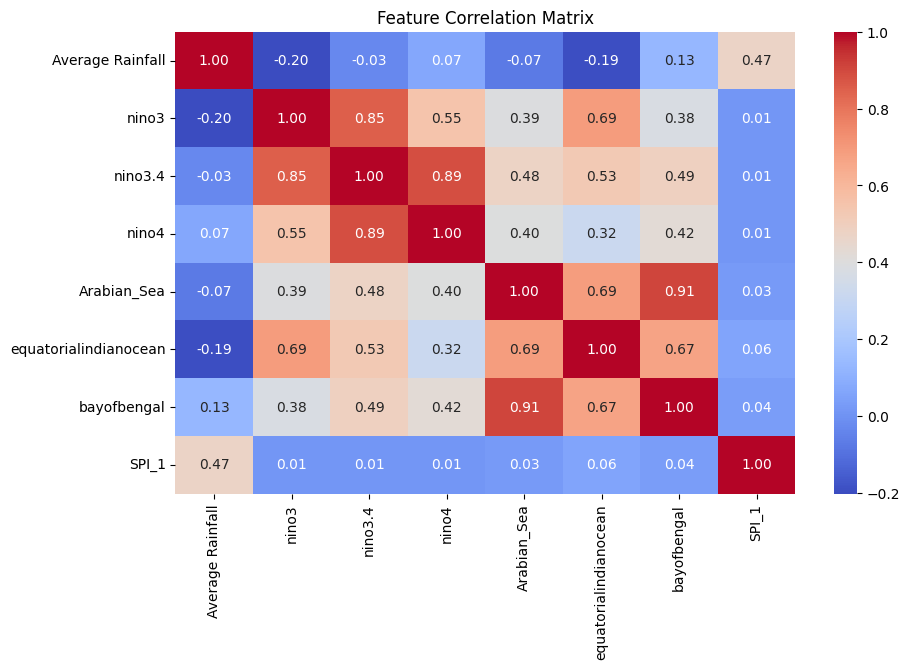

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Correlation matrix (to detect multicollinearity)
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['year', 'month']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Optional: Drop highly correlated features manually if needed
# For example:
# df = df.drop(columns=['nino3.4'])  # if it's very similar to nino3 or nino4

# 3. Feature Scaling (for models like SVR)
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['Average Rainfall', 'year', 'month'])
target = df['Average Rainfall']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
df.head()

,year,month,Average Rainfall,nino3,nino3.4,nino4,Arabian_Sea,equatorialindianocean,bayofbengal,SPI_1
0,1901,1,0.212121,26.116969,27.367524,28.489476,26.006408,27.962291,27.214633,1.002762
1,1901,2,0.010000,26.431279,27.032637,27.911399,25.765964,27.931744,27.232272,-0.895327
2,1901,3,0.076399,26.902539,27.287510,27.964798,26.879438,28.534986,28.201504,0.172279
3,1901,4,0.010000,27.144844,27.620280,28.213469,28.441569,29.290119,29.288933,-0.934717
4,1901,5,0.049348,26.593484,27.660678,28.473432,29.247251,28.960749,29.527194,-0.827211


In [ ]:
df.to_csv("final_rainfall_sst_drought.csv", index=False)

In [ ]:
from google.colab import files
files.download("final_rainfall_sst_drought.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>